# Grand Average PWI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Ruta al archivo
file_path_con = r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Congruent.mat"
file_path_rel = r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Related.mat"
file_path_unr = r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Unrelated.mat"

file_path_con_2 = r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Congruent_2.mat"
file_path_rel_2 = r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Related_2.mat"
file_path_unr_2 = r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Unrelated_2.mat"



In [2]:
# Cargar archivo .mat
mat_data = scipy.io.loadmat(file_path_con)

# Extraer datos EEG
eeg_data = mat_data['EEGData']  # Dimensiones: (1229, 64)
eeg_time = mat_data['EEGTime'].flatten()  # Convertir a 1D
markers = mat_data['Markers']  # Inspeccionar más a fondo si es necesario


In [ ]:
import h5py
import numpy as np

with h5py.File(file_path_con_2, 'r') as mat_data:
    # Extraer los datos EEG y el tiempo
    eeg_data = np.array(mat_data['EEGData'])  # Convertir a un array numpy
    eeg_time = np.array(mat_data['EEGTime'])  # No convertir aún a 1D
    markers = mat_data['Markers'] 


# Load Data PWI ERP Grand Average

In [8]:
import scipy.io
import h5py
import numpy as np

def load_mat_file(file_path):
 
    try:
        # Intentar cargar como v7.2 o inferior
        mat_data = scipy.io.loadmat(file_path)
        print(f"Archivo {file_path} cargado con scipy.io.loadmat")
    except NotImplementedError:
        # Si falla, cargar como v7.3 (HDF5)
        with h5py.File(file_path, 'r') as mat_file:
            print(f"Archivo {file_path} cargado con h5py.File")
            mat_data = {key: np.array(mat_file[key]) for key in mat_file.keys()}
    
    return mat_data

# Rutas de los archivos
file_paths = [
    r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Congruent.mat",
    r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Related.mat",
    r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Unrelated.mat",
    r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Congruent_2.mat",
    r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Related_2.mat",
    r"C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Unrelated_2.mat",
]

files = ['con','rel','unr','con_2','rel_2','unr_2']

# Leer todos los archivos
data_dicts = {}
#for file_path in file_paths:
#    data_dicts[file_path] = load_mat_file(file_path)

for file_name, file_path in zip(files, file_paths):
    data_dicts[file_name] = load_mat_file(file_path)
    
# Acceso a los datos
#for file_path, data in data_dicts.items():
#    print(f"Datos del archivo {file_path}:")
#    for key in data.keys():
#        print(f"  - {key}: {data[key].shape if isinstance(data[key], np.ndarray) else 'No ndarray'}")


Archivo C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Congruent.mat cargado con scipy.io.loadmat
Archivo C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Related.mat cargado con scipy.io.loadmat
Archivo C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Unrelated.mat cargado con scipy.io.loadmat
Archivo C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Congruent_2.mat cargado con h5py.File
Archivo C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Related_2.mat cargado con h5py.File
Archivo C:\Users\Usuario\Documents\Datos EEG\PWI_EEG\ERP\Inc_Unrelated_2.mat cargado con h5py.File


In [10]:
import numpy as np

def normalize_eeg_data(data, axis_time=1):
    """
    Normaliza las dimensiones de los datos EEG.
    Si la dimensión del tiempo no está en el eje `axis_time`, se transpone.
    """
    return data if data.shape[axis_time] >= data.shape[1 - axis_time] else data.T

def extract_and_normalize_data(mat_data):
    """
    Extrae y normaliza los datos EEG, EEGTime y Markers de un archivo.
    Retorna los datos normalizados o `None` si no se encuentran.
    """
    eeg_data = None
    eeg_time = None
    markers = None

    try:
        # Extraer y normalizar EEGData
        if 'EEGData' in mat_data:
            eeg_data = normalize_eeg_data(mat_data['EEGData'])
        else:
            print(f"Advertencia: No se encontró 'EEGData'.")

        # Extraer EEGTime
        if 'EEGTime' in mat_data:
            eeg_time = np.array(mat_data['EEGTime']).squeeze()
        else:
            print(f"Advertencia: No se encontró 'EEGTime'.")

        # Extraer Markers
        if 'Markers' in mat_data:
            markers = np.array(mat_data['Markers']).squeeze()
        else:
            print(f"Advertencia: No se encontró 'Markers'.")

    except Exception as e:
        print(f"Error procesando archivo: {e}")

    return eeg_data, eeg_time, markers

# Diccionarios para almacenar los resultados
EEG_data = {}
eeg_time_dict = {}
eeg_markers_dict = {}

# Procesar todos los archivos
for key, mat_data in data_dicts.items():
    eeg_data, eeg_time, markers = extract_and_normalize_data(mat_data)
    if eeg_data is not None:
        EEG_data[key] = eeg_data
    if eeg_time is not None:
        eeg_time_dict[key] = eeg_time
    if markers is not None:
        eeg_markers_dict[key] = markers

# Verificar dimensiones de los datos normalizados
dimensions = {key: data.shape for key, data in EEG_data.items()}
print(f"Dimensiones normalizadas de los datos: {dimensions}")
# 
# Resumen final
print("\nResumen:")
print(f"Diccionario EEG_data: {list(EEG_data.keys())}")
print(f"Diccionario eeg_time: {list(eeg_time_dict.keys())}")
print(f"Diccionario eeg_markers: {list(eeg_markers_dict.keys())}")


Dimensiones normalizadas de los datos: {'con': (64, 1229), 'rel': (64, 1229), 'unr': (64, 1229), 'con_2': (64, 1229), 'rel_2': (64, 1229), 'unr_2': (64, 1229)}

Resumen:
Diccionario EEG_data: ['con', 'rel', 'unr', 'con_2', 'rel_2', 'unr_2']
Diccionario eeg_time: ['con', 'rel', 'unr', 'con_2', 'rel_2', 'unr_2']
Diccionario eeg_markers: ['con', 'rel', 'unr', 'con_2', 'rel_2', 'unr_2']


In [11]:
import pandas as pd

# Suponiendo que `electrode_data` es el contenido de mat_data['Properties']
electrodes = []
for e in data_dicts['con']['Properties'][0][0][5][0]:
    electrode = {
        'Name': e[0][0],
        'X_coord': e[1][0][0],
        'Y_coord': e[3][0][0],
        'Property1': e[2][0][0],
        'Property2': e[4][0][0],
    }
    electrodes.append(electrode)

df_electrodes = pd.DataFrame(electrodes)
print(df_electrodes.head(64))


   Name X_coord Y_coord  Property1  Property2
0   Fp1     -72     -90          1          0
1   AF7     -54     -90          1          0
2   AF3     -68     -74          1          0
3    F1     -68     -49          1          0
4    F3     -51     -60          1          0
..  ...     ...     ...        ...        ...
59   P8     -36      90          1          0
60  P10     -36     113          1          0
61  PO8     -54      90          1          0
62  PO4     -68      74          1          0
63   O2     -72      90          1          0

[64 rows x 5 columns]


In [5]:
data_dicts['con']['Properties']

array([[(array([[257]], dtype=uint16), array([[976.5625]]), array([[1229]], dtype=uint16), array([[19]], dtype=uint8), array([[1]], dtype=uint8), array([[(array(['Fp1'], dtype='<U3'), array([[-72]], dtype=int16), array([[1]], dtype=uint8), array([[-90]], dtype=int16), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8)),
                (array(['AF7'], dtype='<U3'), array([[-54]], dtype=int16), array([[1]], dtype=uint8), array([[-90]], dtype=int16), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8)),
                (array(['AF3'], dtype='<U3'), array([[-68]], dtype=int16), array([[1]], dtype=uint8), array([[-74]], dtype=int16), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8)),
                (array(['F1'], dtype='<U2'), array([[-68]], dtype=int16), array([[1]], dtype=uint8), array([[-49]], dtype=int16), array([[0]],

In [6]:
EEG_data['con']

array([[ 1.0196061 ,  0.9758983 ,  0.9346501 , ...,  0.88394386,
         0.84722537,  0.7991316 ],
       [ 0.7367575 ,  0.7164842 ,  0.69402945, ...,  0.5952273 ,
         0.60487366,  0.6027582 ],
       [ 0.5558051 ,  0.54081136,  0.5197295 , ...,  0.20544721,
         0.19212027,  0.17648037],
       ...,
       [-0.5399544 , -0.5395811 , -0.5384848 , ..., -0.430466  ,
        -0.41118106, -0.38031587],
       [-0.44366837, -0.42932114, -0.41329533, ...,  0.2351149 ,
         0.23128384,  0.23346354],
       [-0.7171133 , -0.6963438 , -0.6760065 , ...,  0.0933739 ,
         0.11560194,  0.14880972]], dtype=float32)

In [7]:
df_electrodes.to_excel('electrodos.xlsx', index=False)

In [8]:
print(df_electrodes['Name'])

0     Fp1
1     AF7
2     AF3
3      F1
4      F3
     ... 
59     P8
60    P10
61    PO8
62    PO4
63     O2
Name: Name, Length: 64, dtype: object


In [12]:
import numpy as np

pools = {
    "FrontoCentral": ['C1', 'C2', 'Cz', 'FC1', 'FC2', 'FCz'],
    "Fronto": ['F1', 'F2', 'FC1', 'FC2', 'FCz', 'Fz'],
    "Frontal": ['F1', 'F2', 'FCz', 'Fz'],
    "Cz": ['Cz'],
    "Parietal": ['POz', 'Pz'],
    "Occipital": ['Iz', 'O1', 'O2', 'Oz']
}

EEG_pool_data = {}

# Para cada condición en EEG_data (con, rel, unr, con_2, rel_2, unr_2)
for condition, data in EEG_data.items():
    # Crear el diccionario para cada condición
    pool_dict = {}
    for pool_name, electrodes in pools.items():
        indices = [df_electrodes['Name'].str.contains(e).idxmax() for e in electrodes]
        pool_data = data[indices, : ]
        pool_dict[pool_name] = np.mean(pool_data, axis=0)
    EEG_pool_data[condition] = pool_dict

#print(EEG_pool_data)


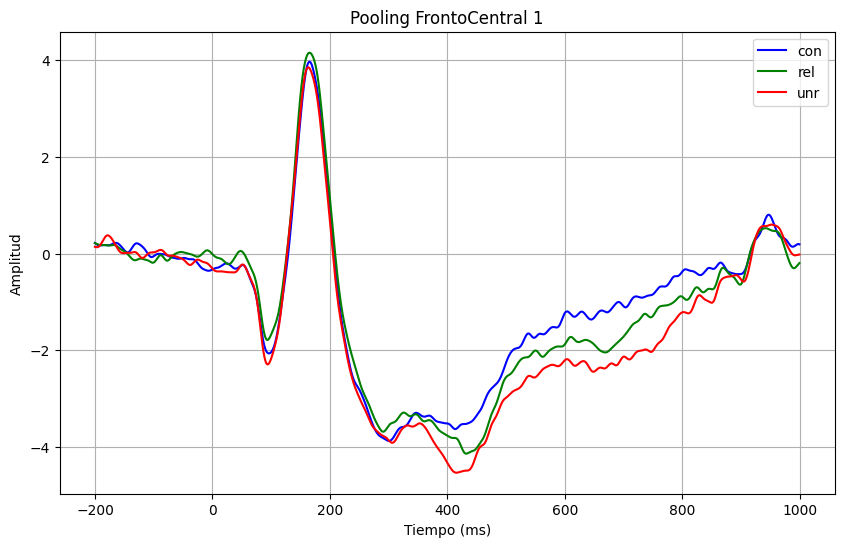

In [13]:
import matplotlib.pyplot as plt

# Datos de las señales
time_con = eeg_time_dict['con']
time_rel = eeg_time_dict['rel']
time_unr = eeg_time_dict['unr']

eeg_con = EEG_pool_data['con']['FrontoCentral']
eeg_rel = EEG_pool_data['rel']['FrontoCentral']
eeg_unr = EEG_pool_data['unr']['FrontoCentral']

# Crear el gráfico
plt.figure(figsize=(10, 6))

plt.plot(time_con, eeg_con, label='con', color='b')
plt.plot(time_rel, eeg_rel, label='rel', color='g')
plt.plot(time_unr, eeg_unr, label='unr', color='r')

# Etiquetas y título
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.title('Pooling FrontoCentral 1')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()


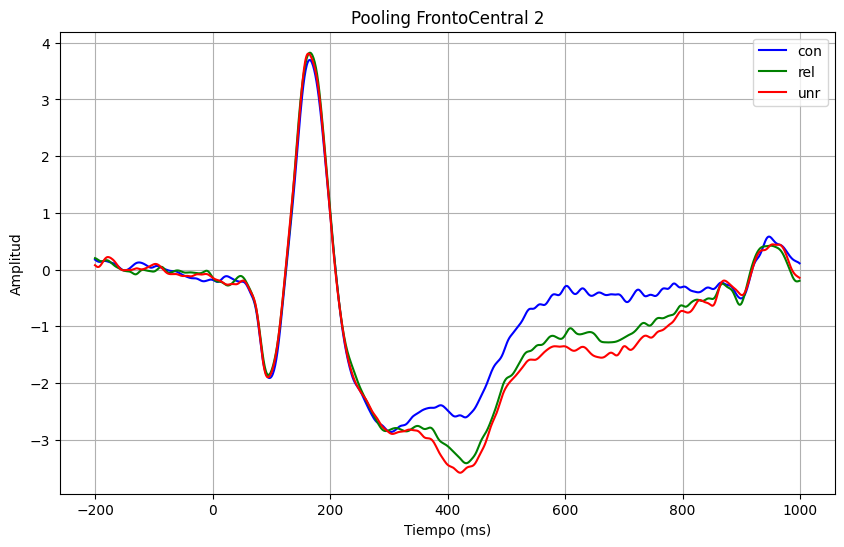

In [11]:
import matplotlib.pyplot as plt

# Datos de las señales
time_con = eeg_time_dict['con_2']
time_rel = eeg_time_dict['rel_2']
time_unr = eeg_time_dict['unr_2']

eeg_con = EEG_pool_data['con_2']['FrontoCentral']
eeg_rel = EEG_pool_data['rel_2']['FrontoCentral']
eeg_unr = EEG_pool_data['unr_2']['FrontoCentral']

# Crear el gráfico
plt.figure(figsize=(10, 6))

plt.plot(time_con, eeg_con, label='con', color='b')
plt.plot(time_rel, eeg_rel, label='rel', color='g')
plt.plot(time_unr, eeg_unr, label='unr', color='r')

# Etiquetas y título
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud')
plt.title('Pooling FrontoCentral 2')
plt.legend()

# Mostrar gráfico
plt.grid(True)
plt.show()


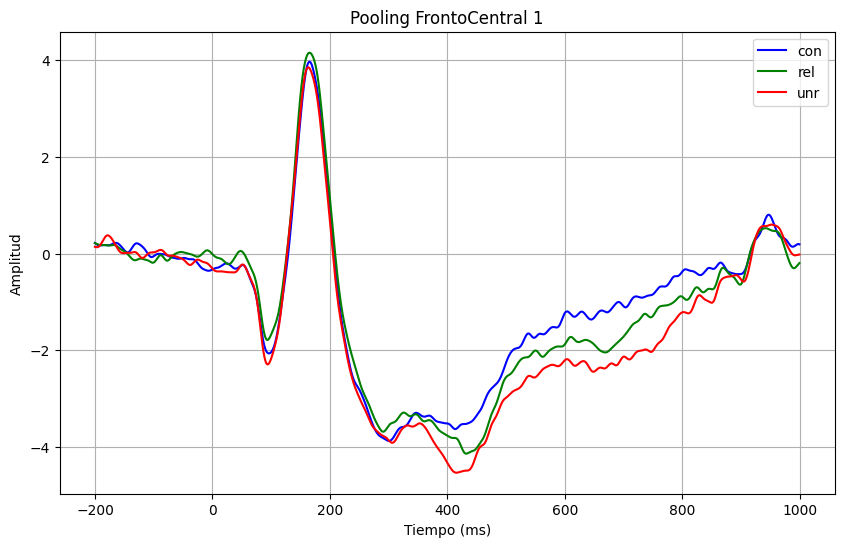

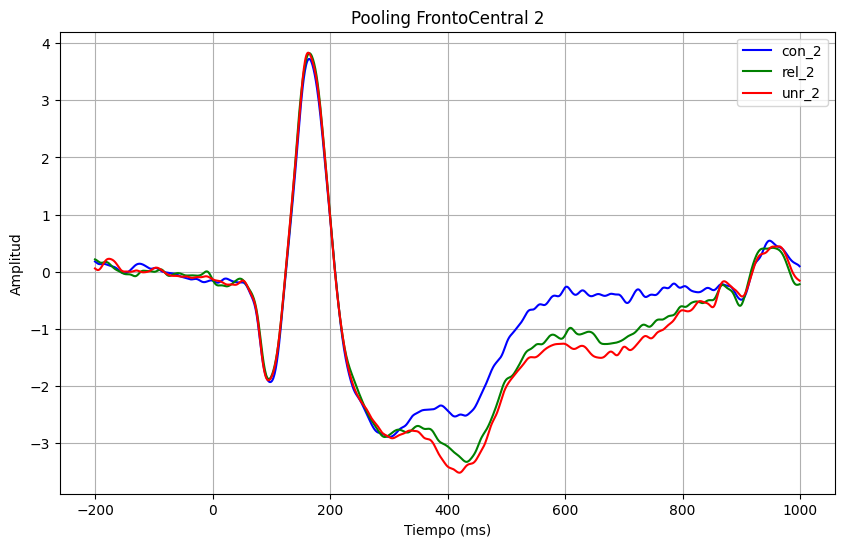

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular EEG_pool_data
def compute_pool_data(EEG_data, pools, df_electrodes):
    EEG_pool_data = {}
    for condition, data in EEG_data.items():
        pool_dict = {}
        for pool_name, electrodes in pools.items():
            indices = [df_electrodes['Name'].str.contains(e).idxmax() for e in electrodes]
            pool_data = data[indices, :]
            pool_dict[pool_name] = np.mean(pool_data, axis=0)
        EEG_pool_data[condition] = pool_dict
    return EEG_pool_data

# Función para graficar datos
def plot_pooled_data(time_dict, EEG_pool_data, condition_keys, pool_name, title):
    plt.figure(figsize=(10, 6))
    colors = ['b', 'g', 'r']
    for i, condition in enumerate(condition_keys):
        time = time_dict[condition]
        signal = EEG_pool_data[condition][pool_name]
        plt.plot(time, signal, label=condition, color=colors[i])
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Amplitud')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Diccionarios y configuraciones iniciales
pools = {
    "FrontoCentral": ['C1', 'C2', 'Cz', 'FC1', 'FC2', 'FCz'],
    "Fronto": ['F1', 'F2', 'FC1', 'FC2', 'FCz', 'Fz'],
    "Frontal": ['F1', 'F2', 'FCz', 'Fz'],
    "Cz": ['Cz'],
    "Parietal": ['POz', 'Pz'],
    "Occipital": ['Iz', 'O1', 'O2', 'Oz']
}

# Calcular los datos agrupados
EEG_pool_data = compute_pool_data(EEG_data, pools, df_electrodes)

# Graficar las señales
plot_pooled_data(
    eeg_time_dict, 
    EEG_pool_data, 
    ['con', 'rel', 'unr'], 
    'FrontoCentral', 
    'Pooling FrontoCentral 1'
)

plot_pooled_data(
    eeg_time_dict, 
    EEG_pool_data, 
    ['con_2', 'rel_2', 'unr_2'], 
    'FrontoCentral', 
    'Pooling FrontoCentral 2'
)


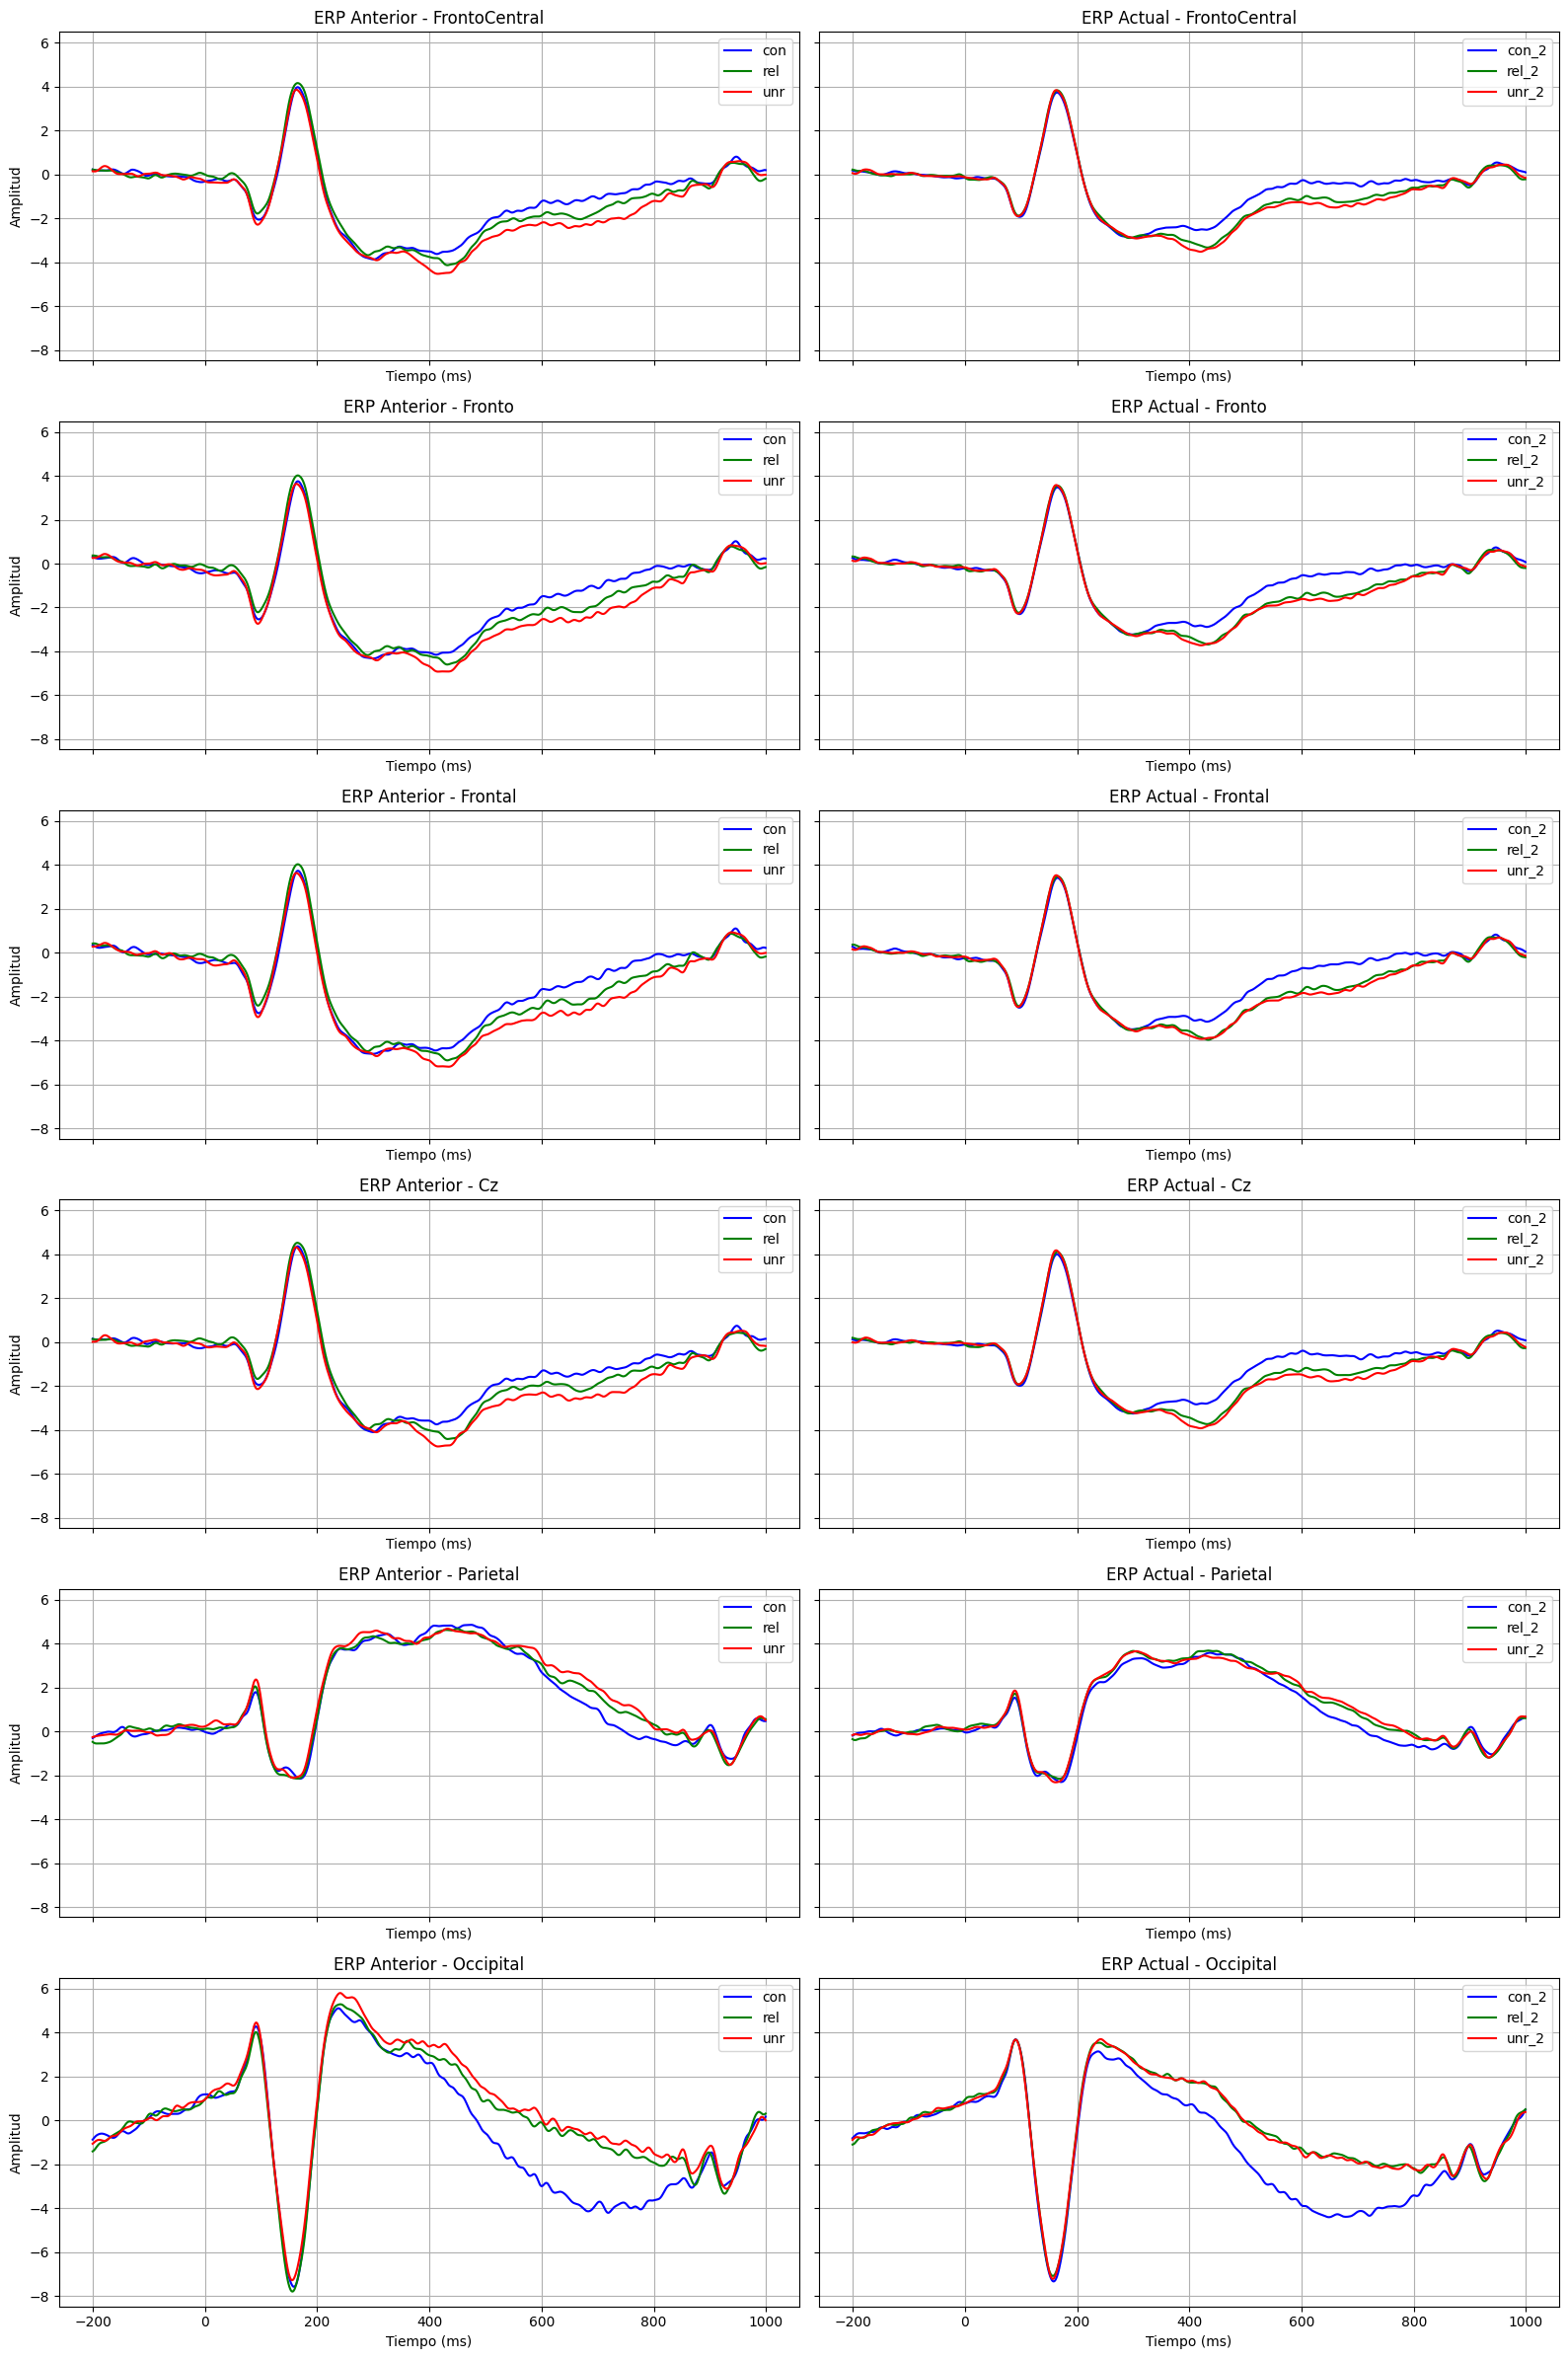

In [15]:
import matplotlib.pyplot as plt

# Función para graficar todos los pooling
def plot_all_pools_comparison(time_dict, EEG_pool_data, condition_keys_previous, condition_keys_current, pools, title_previous, title_current):
    """
    Grafica todas las agrupaciones (pools) en subplots hacia abajo.
    """
    n_pools = len(pools)
    fig, axes = plt.subplots(n_pools, 2, figsize=(16, 4 * n_pools), sharex=True, sharey=True)
    
    colors = ['b', 'g', 'r']
    
    for i, (pool_name, electrodes) in enumerate(pools.items()):
        # Gráfico de la columna Anterior
        for j, condition in enumerate(condition_keys_previous):
            time = time_dict[condition]
            signal = EEG_pool_data[condition][pool_name]
            axes[i, 0].plot(time, signal, label=condition, color=colors[j])
        axes[i, 0].set_title(f"{title_previous} - {pool_name}")
        axes[i, 0].set_xlabel('Tiempo (ms)')
        axes[i, 0].set_ylabel('Amplitud')
        axes[i, 0].legend()
        axes[i, 0].grid(True)
        
        # Gráfico de la columna Actual
        for j, condition in enumerate(condition_keys_current):
            time = time_dict[condition]
            signal = EEG_pool_data[condition][pool_name]
            axes[i, 1].plot(time, signal, label=condition, color=colors[j])
        axes[i, 1].set_title(f"{title_current} - {pool_name}")
        axes[i, 1].set_xlabel('Tiempo (ms)')
        axes[i, 1].legend()
        axes[i, 1].grid(True)
    
    # Ajustar diseño
    plt.tight_layout()
    plt.show()

# Graficar todas las agrupaciones
plot_all_pools_comparison(
    eeg_time_dict, 
    EEG_pool_data, 
    ['con', 'rel', 'unr'],  # Condiciones anteriores
    ['con_2', 'rel_2', 'unr_2'],  # Condiciones actuales
    pools,  # Todos los pools
    'ERP Anterior',  # Título de la columna anterior
    'ERP Actual'     # Título de la columna actual
)
